In [135]:
import math
import random
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm as tqdm

import import_ipynb
import data_transformation
import unittest
from sklearn.model_selection import train_test_split 

In [2]:
data_class = data_transformation.data_transformation(path_data = "/data/data_curated_20180219/curated_training_data_no_mass_spec.csv",
                                                     path_mhc = "/data/aligned_mhc_dataset.csv",
                                                     allele_name = None,
                                                     quant_data = True,
                                                     encoding = "one-hot")

pep, mhc, target = data_class.__getitem__()

pep = np.expand_dims(pep, axis=1)
mhc = np.expand_dims(mhc, axis=1)
inp = np.hstack((pep, mhc))
print(inp.shape)

X_train, X_test, y_train, y_test = train_test_split(inp, target.T, test_size=0.2, random_state=42)

(137377, 2, 34, 20)


## Train and Test set have same distribution of the target values

(array([2.2000e+01, 5.6100e+02, 4.8570e+04, 1.9681e+04, 1.7273e+04,
        1.3543e+04, 7.4100e+03, 2.5370e+03, 2.9500e+02, 9.0000e+00]),
 array([-1.43017093, -1.21535945, -1.00054797, -0.7857365 , -0.57092502,
        -0.35611354, -0.14130206,  0.07350942,  0.2883209 ,  0.50313238,
         0.71794386]),
 <a list of 10 Patch objects>)

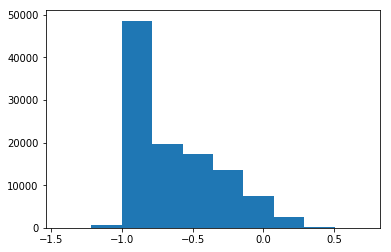

In [18]:
plt.hist(y_train.flatten())

(array([2.1000e+01, 1.5730e+03, 1.2146e+04, 4.8900e+03, 3.8830e+03,
        2.9350e+03, 1.6540e+03, 3.5800e+02, 1.3000e+01, 3.0000e+00]),
 array([-1.34103584, -1.13275871, -0.92448158, -0.71620445, -0.50792732,
        -0.29965019, -0.09137306,  0.11690408,  0.32518121,  0.53345834,
         0.74173547]),
 <a list of 10 Patch objects>)

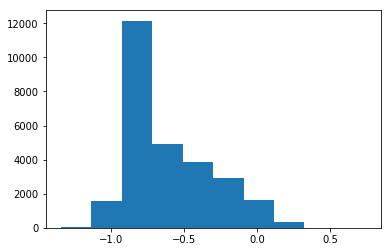

In [25]:
plt.hist(y_test.flatten())

## Naive Model taking only the mean value lead to RMSE of 0.3

In [43]:
pred = np.full(len(y_test.flatten()), np.mean(y_test.flatten()))

In [47]:
error = pred - y_test.flatten()
error2 = np.square(error)
rmse = np.sqrt(np.mean(error2))
rmse

0.2928557865457815

## Comparision of input values of test and train set

In [156]:
results_max = []
for j in tqdm(range(1000)):#len(X_train))):
    a = X_train[j, 0][~np.all(X_train[j, 0] == 0, axis=1)]
    results = []
    for i in range(len(X_test)):
        b = X_test[i, 0][~np.all(X_test[i, 0] == 0, axis=1)]
        #print(b.size)
        if a.size > b.size:
            temp_b = np.zeros(a.shape)
            temp_b[:b.shape[0],:b.shape[1]] = b
            temp = np.sum(np.all(a == temp_b, axis=1))
        elif a.size < b.size:
            temp_a = np.zeros(b.shape)
            temp_a[:a.shape[0],:a.shape[1]] = a
            temp = np.sum(np.all(temp_a == b, axis=1))
        else:
            temp = np.sum(np.all(a == b, axis=1))
        if a.shape[1] >= b.shape[1]:
            results.append(temp / a.shape[0])
        else:
            results.append(temp / b.shape[0])
    results_max.append(max(results))


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [14:07<00:00,  1.18it/s]


(array([ 13.,   0.,  40.,   0.,  48., 104.,   0.,   3.,   2.,  24.,   6.,
          0.,   8.,   1.,   0.,   0.,  41.,   1.,   0., 709.]),
 array([0.375  , 0.40625, 0.4375 , 0.46875, 0.5    , 0.53125, 0.5625 ,
        0.59375, 0.625  , 0.65625, 0.6875 , 0.71875, 0.75   , 0.78125,
        0.8125 , 0.84375, 0.875  , 0.90625, 0.9375 , 0.96875, 1.     ]),
 <a list of 20 Patch objects>)

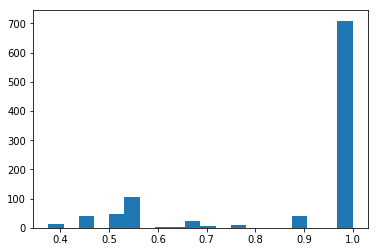

In [161]:
plt.hist(results_max, bins = 20)